##THEORETICAL

1.What is Logistic Regression, and how does it differ from Linear Regression.


In [ ]:
'''Logistic Regression is a statistical model used for binary classification.
Unlike Linear Regression, which predicts continuous values, Logistic Regression predicts probabilities for class membership.
It applies the sigmoid function to transform linear predictions into probabilities.'''

2.What is the mathematical equation of Logistic Regression.


In [ ]:
'''The Logistic Regression model is defined as:

P(Y=1∣X)= 1 / 1+e^-(β0+β1X1+β2X2+...+βnXn)

where

P(Y=1∣X) is the probability of the positive class, and
β are the model coefficients.

'''

3.Why do we use the Sigmoid function in Logistic Regression.


In [ ]:
'''The sigmoid function maps any real-valued number into the range (0,1),
making it suitable for probability estimation.
It ensures that the output is interpretable as a probability.

σ(z)= 1 / 1+e^−z


​
'''

4.What is the cost function of Logistic Regression.


In [ ]:
'''Instead of Mean Squared Error (MSE),
we use the log loss (cross-entropy loss):

J(θ) = −1/m i=1∑m [yilog(y^i)+(1−yi)log(1−y^i)]
This function penalizes incorrect predictions based on confidence.'''

5.What is Regularization in Logistic Regression? Why is it needed.


In [ ]:
'''Regularization adds a penalty term to the cost function to prevent overfitting by discouraging large coefficients. Common types:

L1 (Lasso): Adds absolute values of coefficients.
L2 (Ridge): Adds squared values of coefficients.'''

6.Explain the difference between Lasso, Ridge, and Elastic Net regression.


In [ ]:
'''Lasso (L1): Shrinks some coefficients to zero, performing feature selection.
Ridge (L2): Shrinks coefficients but keeps all features.
Elastic Net: Combines L1 and L2 regularization.'''

7.When should we use Elastic Net instead of Lasso or Ridge.


In [ ]:
'''Elastic Net is preferable when:

There are highly correlated features.
We want sparse solutions but also retain some regularization.
'''

8.What is the impact of the regularization parameter (λ) in Logistic Regression.


In [ ]:
'''High λ: More regularization → smaller coefficients → underfitting.
Low λ: Less regularization → larger coefficients → risk of overfitting.
'''

9.What are the key assumptions of Logistic Regression.


In [ ]:
'''Linear relationship between predictors and log-odds.
No multicollinearity (independent features).
Independent observations.
Large sample size for stability.
'''

10.What are some alternatives to Logistic Regression for classification tasks.


In [ ]:
'''Decision Trees
Random Forest
Support Vector Machines (SVM)
Neural Networks
Naïve Bayes'''

11.What are Classification Evaluation Metrics.


In [ ]:
'''Accuracy
Precision, Recall, F1-score
ROC-AUC
Log loss'''

12.How does class imbalance affect Logistic Regression.


In [ ]:
'''Model predicts the majority class more often.
Poor recall for the minority class.
Solutions: Resampling, class weights, SMOTE.'''

13.What is Hyperparameter Tuning in Logistic Regression.


In [ ]:
'''Finding optimal C (inverse of λ) for regularization.
Choosing the best solver (liblinear, saga, etc.).
Using Grid Search or Random Search for optimization.
'''

14.What are different solvers in Logistic Regression? Which one should be used.


In [ ]:
'''liblinear: Good for small datasets (supports L1 & L2).
saga: Best for large datasets with L1/L2.
newton-cg: Good for L2 regularization.'''

15.How is Logistic Regression extended for multiclass classification.


In [ ]:
'''One-vs-Rest (OvR): Train a separate model for each class.
Softmax Regression: Generalizes sigmoid for multiple classes.
'''

16.What are the advantages and disadvantages of Logistic Regression.


In [ ]:
'''Advantages:

Simple and interpretable.
Works well with small datasets.

Disadvantages:

Assumes linear decision boundary.
Can be sensitive to outliers.'''

17.What are some use cases of Logistic Regression.


In [ ]:
'''Medical diagnosis (disease prediction).
Spam detection.
Credit risk assessment.'''

18.What is the difference between Softmax Regression and Logistic Regression.


In [ ]:
'''Logistic Regression: Used for binary classification.
Softmax Regression: Used for multiclass classification.
'''

19.How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification.


In [ ]:
'''OvR: Better for imbalanced data.
Softmax: More efficient for large datasets with balanced classes.
'''

20.How do we interpret coefficients in Logistic Regression?

In [ ]:
'''Exponentiate coefficients to get odds ratios.
A positive coefficient increases the odds of class 1.
A negative coefficient decreases the odds.'''

##PRACTICAL

1.Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy.


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.4f}')


Model Accuracy: 0.9561


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2.Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1') and print the model accuracy.


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression with L1 regularization
model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy with L1 Regularization: {accuracy:.4f}')


Model Accuracy with L1 Regularization: 0.9561


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


3.Write a Python program to train Logistic Regression with L2 regularization (Ridge) using Logistic Regression(penalty='l2'). Print model accuracy and coefficients.


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression with L2 regularization
model = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy with L2 Regularization: {accuracy:.4f}')

# Print coefficients
print("Model Coefficients:", model.coef_)


Model Accuracy with L2 Regularization: 0.9561
Model Coefficients: [[ 2.13248406e+00  1.52771940e-01 -1.45091255e-01 -8.28669349e-04
  -1.42636015e-01 -4.15568847e-01 -6.51940282e-01 -3.44456106e-01
  -2.07613380e-01 -2.97739324e-02 -5.00338038e-02  1.44298427e+00
  -3.03857384e-01 -7.25692126e-02 -1.61591524e-02 -1.90655332e-03
  -4.48855442e-02 -3.77188737e-02 -4.17516190e-02  5.61347410e-03
   1.23214996e+00 -4.04581097e-01 -3.62091502e-02 -2.70867580e-02
  -2.62630530e-01 -1.20898539e+00 -1.61796947e+00 -6.15250835e-01
  -7.42763610e-01 -1.16960181e-01]]


4.Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet').


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression with Elastic Net
model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1.0, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy with Elastic Net: {accuracy:.4f}')


Model Accuracy with Elastic Net: 0.9649


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


5.Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr'.


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

# Load dataset
data = load_digits()
X, y = data.data, data.target  # Multiclass dataset

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression for multiclass classification using OVR
model = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Multiclass Classification Accuracy (OVR): {accuracy:.4f}')


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Multiclass Classification Accuracy (OVR): 0.9611


6.Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression. Print the best parameters and accuracy.


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model and hyperparameter grid
model = LogisticRegression(solver='liblinear')
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Perform GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Accuracy: {grid_search.best_score_:.4f}')


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Best Parameters: {'C': 10, 'penalty': 'l2'}
Best Accuracy: 0.9626


7.Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy.


In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Define model
model = LogisticRegression(max_iter=1000)

# Perform Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

# Print average accuracy
print(f'Average Accuracy: {scores.mean():.4f}')


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Average Accuracy: 0.9473


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


8.Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy.

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset from CSV
# Replace 'data.csv' with the actual file path or make sure 'data.csv' is in the current working directory
file_path = 'data.csv'  # Or provide the full path if the file is in a different directory
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the file path and ensure the file exists.")
    # You can optionally add code here to handle the error, like asking the user to input the correct path.
    # For example:
    # file_path = input("Enter the correct file path: ")
    # df = pd.read_csv(file_path)
else:
    X = df.drop(columns=['target'])  # Assuming 'target' is the label column
    y = df['target']

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Logistic Regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Model Accuracy: {accuracy:.4f}')

Error: The file 'data.csv' was not found. Please check the file path and ensure the file exists.


9.Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy.


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model and hyperparameter grid
model = LogisticRegression(solver='saga', max_iter=1000)
param_dist = {
    'C': np.logspace(-3, 3, 10),
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['liblinear', 'saga']
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Best parameters and accuracy
print(f'Best Parameters: {random_search.best_params_}')
print(f'Best Accuracy: {random_search.best_score_:.4f}')


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means 

Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.004641588833612777}
Best Accuracy: 0.9253


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
   

10.Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy.


In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.multiclass import OneVsOneClassifier

# Load dataset
data = load_digits()
X, y = data.data, data.target  # Multiclass dataset

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train One-vs-One (OvO) Logistic Regression
model = OneVsOneClassifier(LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Multiclass Classification Accuracy (OvO): {accuracy:.4f}')


Multiclass Classification Accuracy (OvO): 0.9833


11.Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


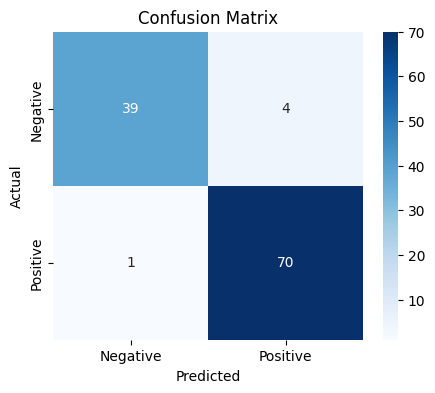

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


12.Write a Python program to train a Logistic Regression model and evaluate its performance using Precision,Recall, and F1-Score.


In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')


Precision: 0.9459
Recall: 0.9859
F1-Score: 0.9655


13.Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance.

In [13]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Train model with class weights
model = LogisticRegression(class_weight=class_weight_dict, max_iter=1000)
model.fit(X_train, y_train)

# Evaluate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy with Class Weights: {accuracy:.4f}')


Model Accuracy with Class Weights: 0.9737


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


14.Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance.


In [14]:
import seaborn as sns
from sklearn.impute import SimpleImputer

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Select features and target
df = df[['sex', 'age', 'fare', 'survived']].dropna()
X = pd.get_dummies(df[['sex', 'age', 'fare']], drop_first=True)
y = df['survived']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate accuracy
accuracy = accuracy_score(y_test, model.predict(X_test))
print(f'Titanic Dataset Accuracy: {accuracy:.4f}')


Titanic Dataset Accuracy: 0.7483


15.Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling.


In [15]:
from sklearn.preprocessing import StandardScaler

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model on scaled data
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Evaluate accuracy
accuracy_scaled = accuracy_score(y_test, model.predict(X_test_scaled))
print(f'Accuracy with Scaling: {accuracy_scaled:.4f}')


Accuracy with Scaling: 0.7483


16.Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score.


In [16]:
from sklearn.metrics import roc_auc_score

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1])
print(f'ROC-AUC Score: {roc_auc:.4f}')


ROC-AUC Score: 0.7473


17.Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy.


In [17]:
# Train model with custom regularization strength
model = LogisticRegression(C=0.5, max_iter=1000)
model.fit(X_train, y_train)

# Evaluate accuracy
accuracy_custom = accuracy_score(y_test, model.predict(X_test))
print(f'Accuracy with C=0.5: {accuracy_custom:.4f}')


Accuracy with C=0.5: 0.7483


18.Write a Python program to train Logistic Regression and identify important features based on model coefficients.


In [18]:
# Train Logistic Regression
model.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.DataFrame({'Feature': df.columns[:-1], 'Coefficient': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', key=abs, ascending=False)

# Print important features
print(feature_importance)


  Feature  Coefficient
2    fare    -2.271211
0     sex    -0.018521
1     age     0.012864


19.Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score.


In [27]:
# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions using the correct X_test
y_pred = model.predict(X_test)

# Compute Cohen’s Kappa score
kappa_score = cohen_kappa_score(y_test, y_pred)
print(f'Cohen’s Kappa Score: {kappa_score:.4f}')

Cohen’s Kappa Score: 0.4717


20.Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classification.


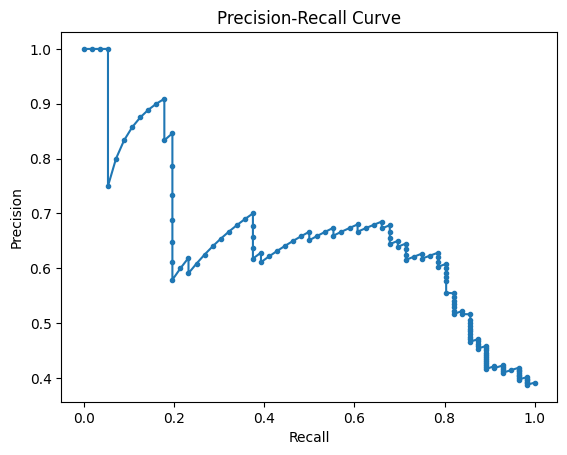

In [20]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])

# Plot precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


21.Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy.


In [21]:
solvers = ['liblinear', 'saga', 'lbfgs']
for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=1000)
    model.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f'Accuracy with {solver}: {accuracy:.4f}')


Accuracy with liblinear: 0.7483
Accuracy with saga: 0.6294
Accuracy with lbfgs: 0.7483


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


22.Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC).


In [26]:
from sklearn.metrics import matthews_corrcoef

# Train the model using the appropriate dataset
model = LogisticRegression(max_iter=1000)  # Initialize the model
model.fit(X_train, y_train)  # Fit the model to your training data

# Make predictions on the test data
y_pred = model.predict(X_test)  # Use the same X_test used for y_test

# Compute Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, y_pred)
print(f'Matthews Correlation Coefficient: {mcc:.4f}')

Matthews Correlation Coefficient: 0.4717


23.Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling.

In [23]:
# Train on raw data
model_raw = LogisticRegression(max_iter=1000)
model_raw.fit(X_train, y_train)
accuracy_raw = accuracy_score(y_test, model_raw.predict(X_test))

# Train on standardized data
model_scaled = LogisticRegression(max_iter=1000)
model_scaled.fit(X_train_scaled, y_train)
accuracy_scaled = accuracy_score(y_test, model_scaled.predict(X_test_scaled))

print(f'Accuracy without Scaling: {accuracy_raw:.4f}')
print(f'Accuracy with Scaling: {accuracy_scaled:.4f}')


Accuracy without Scaling: 0.7483
Accuracy with Scaling: 0.7483


24.Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation.


In [24]:
from sklearn.model_selection import cross_val_score

C_values = [0.001, 0.01, 0.1, 1, 10]
best_C, best_score = 0, 0

for C in C_values:
    model = LogisticRegression(C=C, max_iter=1000)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    avg_score = scores.mean()
    print(f'C={C}: Mean Accuracy = {avg_score:.4f}')

    if avg_score > best_score:
        best_C, best_score = C, avg_score

print(f'Best C: {best_C} with Accuracy: {best_score:.4f}')


C=0.001: Mean Accuracy = 0.6707
C=0.01: Mean Accuracy = 0.7075
C=0.1: Mean Accuracy = 0.7881
C=1: Mean Accuracy = 0.7829
C=10: Mean Accuracy = 0.7829
Best C: 0.1 with Accuracy: 0.7881


25.Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to
make predictions.

In [25]:
import joblib

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'logistic_regression_model.pkl')

# Load the model
loaded_model = joblib.load('logistic_regression_model.pkl')

# Make predictions
y_pred_loaded = loaded_model.predict(X_test)
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)

print(f'Accuracy of Loaded Model: {accuracy_loaded:.4f}')


Accuracy of Loaded Model: 0.7483
